Для начала запишем значения всех наших переменных с которыми мы будем в будущем работать.
Также заранее для построения графика вводим два пустых списка в которые будем записывать значения наших переменных при каждом изменении.

In [26]:
N = 7777 # Общее количество особей в популяции
t = 0 # Начальное время
I = 700 # количество инфицированных особей, распространители инфекции
R = 0 # количество здоровых особей с иммунитетом к болезни
S = N-I-R # количество здоровых особей, но восприимчивые к болезни
a = 0.007 # коэффициент заболевания
b = 0.003 # коэффициент выздоровления
crit_I = 90 # критическое значение зараженных
count_I = [] # для записи изменения количества зараженных особей
count_R = [] # для записи изменения количества особей с иммунитетом
count_S = [] # для записи изменения количества здоровых особей

Введем следующие две библиотеки для работы с графиками.

In [27]:
import matplotlib.pyplot as plt
import numpy as np

Для начала рассмотрим отдельно случай, когда $ I <= I* $.
Для этого
1. зададим цикл, который будет ввести счетчик по дням, будем использовать цикл while так как мы не знаем точное число дней, которое нам понадобиться
2. добавим условия взятые из дифференциальных уравнений модели SIR, для этого случая, т.е только с I и R
3. так как мы используем цикл while, для того чтобы он не работал после достижения цели, придумаем условие для выхода из него, так как когда количество зараженных или распространителей станет равно нулю, распространение эпидемии закончиться, будем использовать как условие цикла выполнение пока I не равно 0.
4. также для того, чтобы понимать за сколько дней с вводными данными закончиться эпидемия добавим счетчик t + 1, на каждом кругу цикла

В этой задаче нам понадобятся следующие переменные:

In [28]:
t = 0 # Начальное время
I = 700 # количество инфицированных особей, распространители инфекции
R = 0 # количество здоровых особей с иммунитетом к болезни
a = 0.007 # коэффициент заболевания
b = 0.003 # коэффициент выздоровления
count_I = [] # для записи изменения количества зараженных особей
count_R = [] # для записи изменения количества особей с иммунитетом

In [29]:
while t != 10000 and int(I) != 0:
    I -= I*b
    R += I*b
    
    count_I.append(I)
    count_R.append(R)
    
    t += 1
print(t)

2181


Отобразим полученные данные на графике, используя наши функции счётчиками и будем его рисовать по количеству дней, за которые закончится эпидемия (полученное t)

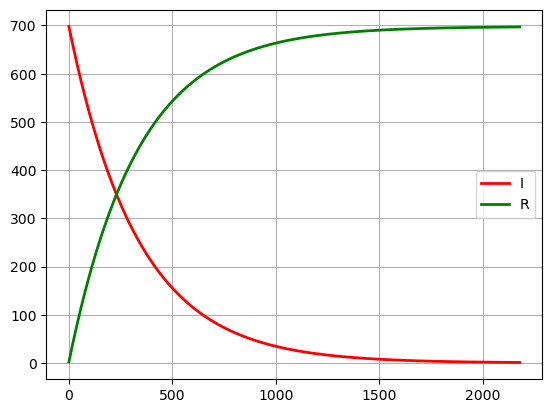

In [30]:
plt.figure(dpi=100) 

plt.plot(np.arange(0, t, 1), count_I, lw=2, label='I', color='red') 
plt.plot(np.arange(0, t, 1), count_R, lw=2, label='R', color='green') 
plt.grid()
plt.legend()

Рассмотрим случай, когда $ I > I* $. 

К переменным из прошлой задачи добавляем 
1. N - общее количество особей в популяции, которое нужно для вычисления S
2. S = N-I-R - количество здоровых особей, но восприимчивые к болезни
3. count_S = [] - счетчик для S

In [31]:
N = 7777 # Общее количество особей в популяции
t = 0 # Начальное время
I = 700 # количество инфицированных особей, распространители инфекции
R = 0 # количество здоровых особей с иммунитетом к болезни
S = N-I-R # количество здоровых особей, но восприимчивые к болезни
a = 0.007 # коэффициент заболевания
b = 0.003 # коэффициент выздоровления
crit_I = 90 # критическое значение зараженных
count_I = [] # для записи изменения количества зараженных особей
count_R = [] # для записи изменения количества особей с иммунитетом
count_S = [] # для записи изменения количества здоровых особей

В цикл из предыдущей задачи добавляем цикл и счетчик для переменной S.

In [32]:
while t != 10000 and int(I) != 0:
    S -= a*S
    I += a*S - I*b
    R += I*b
        
    count_S.append(S)
    count_I.append(I)
    count_R.append(R)
    
    t += 1
print(t)

3153


Также добавляем полученные значения для S к нашим графикам, чтобы наглядно видеть зависимость и изменения.

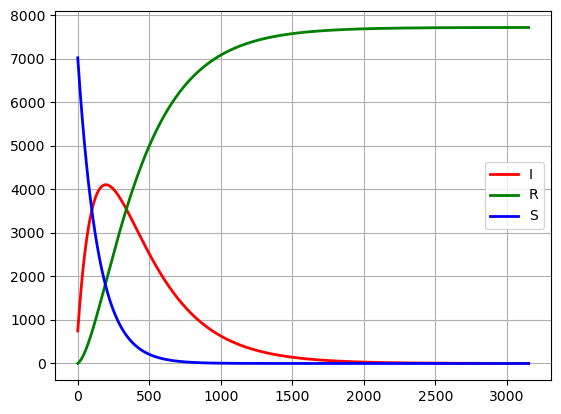

In [33]:
plt.figure(dpi=100) 

plt.plot(np.arange(0, t, 1), count_I, lw=2, label='I', color='red') 
plt.plot(np.arange(0, t, 1), count_R, lw=2, label='R', color='green') 
plt.plot(np.arange(0, t, 1), count_S, lw=2, label='S', color='blue') 
plt.grid()
plt.legend()

Для полноты задачи объединим два случая, которые ранее рассматривали отдельно. 
Также вводим все переменные добавляя критическое значение зараженных.

In [34]:
N = 7777 # Общее количество особей в популяции
t = 0 # Начальное время
I = 700 # количество инфицированных особей, распространители инфекции
R = 0 # количество здоровых особей с иммунитетом к болезни
S = N-I-R # количество здоровых особей, но восприимчивые к болезни
a = 0.007 # коэффициент заболевания
b = 0.003 # коэффициент выздоровления
crit_I = 90 # критическое значение зараженных
count_I = [] # для записи изменения количества зараженных особей
count_R = [] # для записи изменения количества особей с иммунитетом
count_S = [] # для записи изменения количества здоровых особей

Так как данная переменная является условием для определения того по какому из двух случаев должна работать программа, добавляем её в качестве условие в функции if как сравнение с I.
Пока $ I > I* $ мы будем использовать все условия из соответствующей задачи, а когда оно станет меньше или равно, то будем уже использовать все условия из задачи для $ I <= I* $, пока I не станет равно 0.

In [35]:
while t != 10000 and int(I) != 0:
    if I > crit_I:
        S -= a*S
        I += a*S - I*b
        R += I*b
    else:
        I -= I*b
        R += I*b
            
    count_S.append(S)
    count_I.append(I)
    count_R.append(R)
    
    t += 1
print(t)

3153


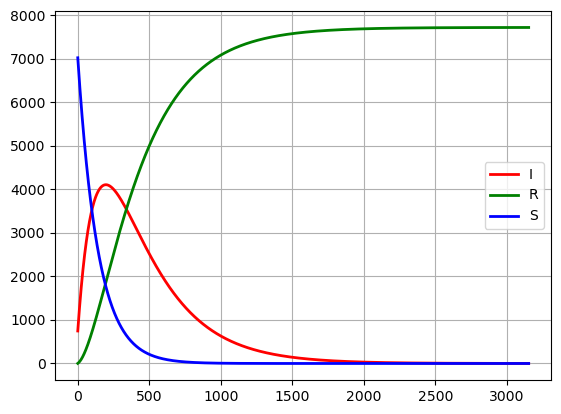

In [36]:
plt.figure(dpi=100) 

plt.plot(np.arange(0, t, 1), count_I, lw=2, label='I', color='red') 
plt.plot(np.arange(0, t, 1), count_R, lw=2, label='R', color='green') 
plt.plot(np.arange(0, t, 1), count_S, lw=2, label='S', color='blue') 
plt.grid()
plt.legend()

#### Метод Рунге-Кутты 4-ого порядка

3182


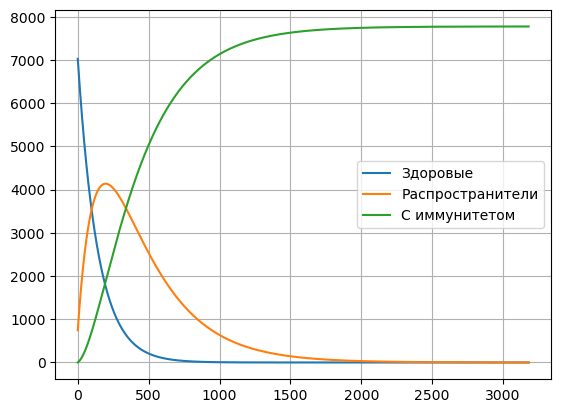

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем параметры
alpha = 0.007
beta = 0.003


# Задаем начальные условия
N = 7777
I = 700
R = 0
S = N-I-R
crit_I = 90

# Задаем временной интервал и шаг
t = 0
t_end = 10000
dt = 1

# Создаем списки для сохранения значений популяции и времени
time = []
count_I = [] 
count_R = [] 
count_S = []

while t < t_end and int(I) != 0:
    if I > crit_I:
        # Подсчет   
        dS1 = dt * alpha * S
        dI1 = dt * (alpha * S - I * beta)
        dR1 = dt * (I * beta)
        
        dS2 = dt * alpha * (S + dS1/2)
        dI2 = dt * (alpha * (S + dS1/2) - (I + dI1/2) * beta)
        dR2 = dt * ((I + dI1/2) * beta)
        
        dS3 = dt * alpha * (S + dS2/2)
        dI3 = dt * (alpha * (S + dS2/2) - (I + dI2/2) * beta)
        dR3 = dt * ((I + dI2/2) * beta)
        
        dS4 = dt * alpha * (S + dS3)
        dI4 = dt * (alpha * (S + dS3) - (I + dI3) * beta)
        dR4 = dt * ((I + dI3) * beta)
    else:
        dS1 = 0
        dI1 = dt * (- I * beta)
        dR1 = dt * (I * beta)
        
        dS2 = 0
        dI2 = dt * (- (I + dI1/2) * beta)
        dR2 = dt * ((I + dI1/2) * beta)
        
        dS3 = 0
        dI3 = dt * (alpha * (S + dS2/2) - (I + dI2/2) * beta)
        dR3 = dt * ((I + dI2/2) * beta)
    
        dS4 = 0
        dI4 = dt * (alpha * (S + dS3) - (I + dI3) * beta)
        dR4 = dt * ((I + dI3) * beta)
        
    # Обновляем значения
    S -= (dS1 + 2 * dS2 + 2 * dS3 + dS4) / 6
    I += (dI1 + 2 * dI2 + 2 * dI3 + dI4) / 6
    R += (dR1 + 2 * dR2 + 2 * dR3 + dR4) / 6
    
    # Сохраняем текущие значения
    time.append(t)
    count_S.append(S)
    count_I.append(I)
    count_R.append(R)
    
    # Обновляем время
    t += dt
print(len(time))
# Рисуем график численности популяций
plt.plot(time, count_S, label='Здоровые')
plt.plot(time, count_I, label='Распространители')
plt.plot(time, count_R, label='С иммунитетом')
plt.grid()
plt.legend()
plt.show() # привет